In [1]:
import quaternions as q

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import networkx as nx

/home/uguen/anaconda2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
N = 10 
c1 = np.random.rand(N,3)
c2 = np.random.rand(N,3)
c3 = np.random.rand(N,3)
c4 = np.random.rand(N,3)

<IPython.core.display.Javascript object>


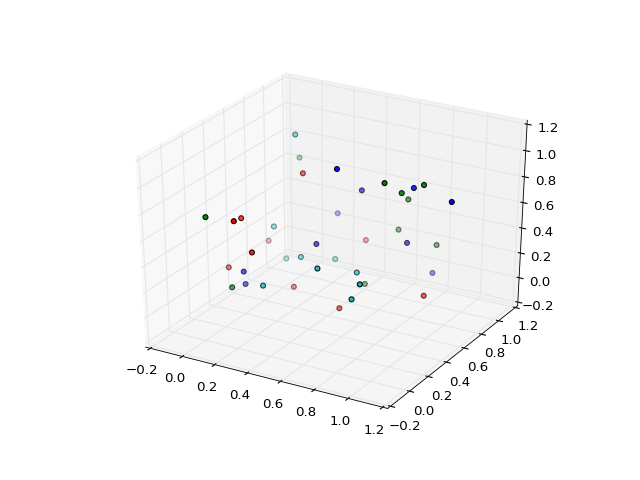

In [4]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(c1[:,0],c1[:,1],c1[:,2],c='r')
ax.scatter(c2[:,0],c2[:,1],c2[:,2],c='b')
ax.scatter(c3[:,0],c3[:,1],c3[:,2],c='g')
ax.scatter(c4[:,0],c4[:,1],c4[:,2],c='c')

In [5]:
import imusim.maths.quaternions as q

Creation d'un vecteur unitaire et d'un angle

In [95]:
u21 = np.random.rand(3)
un21 = u21/np.sum(u21*u21)
th21 = 2*np.pi*np.random.rand(1)

In [96]:
qt21 = q.Quaternion(0,2,3,4)
qr21 = q.Quaternion(np.cos(th21/2),np.sin(th21/2)*un21[0],np.sin(th21/2)*un21[1],np.sin(th21/2)*un21[2])

In [97]:
u32 = np.random.rand(3)
un32 = u32/np.sum(u32*u32)
th32 = 2*np.pi*np.random.rand(1)

In [98]:
qt32 = q.Quaternion(0,2,-3,1)
qr32 = q.Quaternion(np.cos(th32/2),np.sin(th32/2)*un32[0],np.sin(th32/2)*un32[1],np.sin(th32/2)*un32[2])

Création des quaternions associés aux coordonnées dans $\mathbb{R}^3$ des différents nuages de points

In [99]:
qc1=q.QuaternionArray(np.hstack((np.zeros(N)[:,None],c1)))
qc2=q.QuaternionArray(np.hstack((np.zeros(N)[:,None],c2)))
qc3=q.QuaternionArray(np.hstack((np.zeros(N)[:,None],c3)))
qc4=q.QuaternionArray(np.hstack((np.zeros(N)[:,None],c4)))

Cacul du nuage de point 2 dans le repère de l'objet 1

+ Rotation de theta vis à vis de u  
+ translation de qt 
+ obtention du vecteur c21


In [100]:
qc21r=qr21*qc2*qr21.conjugate

In [101]:
c21=(qc21r.vector+qt21.vector).T

In [102]:
c21

array([[ 2.82513698,  3.58843629,  5.59538435],
       [ 3.92350267,  3.30967756,  3.98935431],
       [ 2.62773764,  3.38889519,  5.34351206],
       [ 3.14485054,  2.50051791,  5.01306862],
       [ 3.88130549,  3.62747668,  5.14682323],
       [ 3.52040453,  3.71000378,  5.46901433],
       [ 3.30972316,  3.15792121,  4.15369377],
       [ 3.48010834,  2.97238282,  4.25095061],
       [ 3.43489862,  2.73043347,  4.251341  ],
       [ 3.37342323,  2.56502839,  4.32182919]])

In [103]:
qc32r=qr32*qc3*qr32.conjugate
c32=(qc32r.vector+qt32.vector).T

<IPython.core.display.Javascript object>


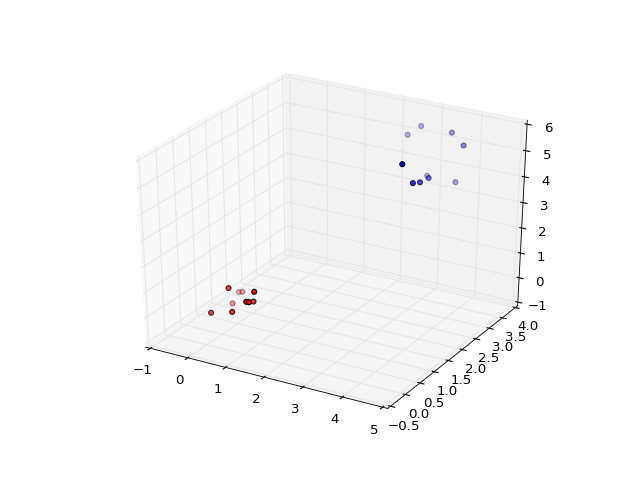

In [104]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(c1[:,0],c1[:,1],c1[:,2],c='r')
ax.scatter(c21[:,0],c21[:,1],c21[:,2],c='b')


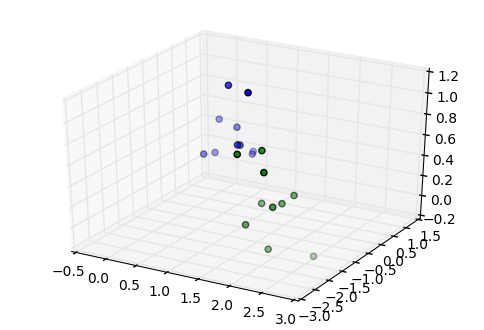

In [85]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(c2[:,0],c2[:,1],c2[:,2],c='b')
ax.scatter(c32[:,0],c32[:,1],c32[:,2],c='g')

In [105]:
qeq =qr32*qr21
qc3e=qeq*qc3*qeq.conjugate
c31=(qc3e.vector+qt32.vector+qt21.vector).T

<IPython.core.display.Javascript object>


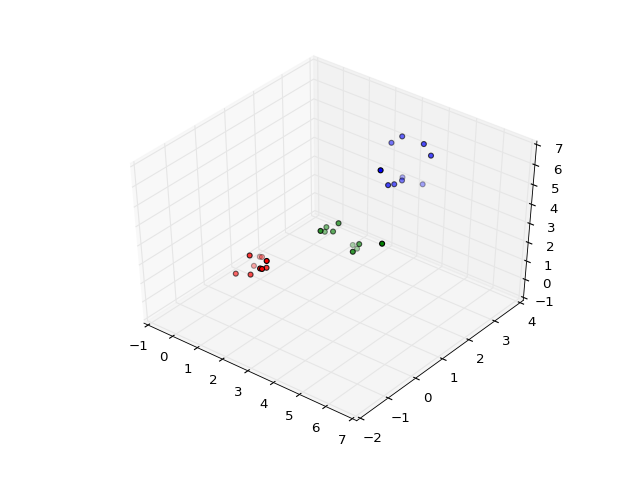

In [107]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(c1[:,0],c1[:,1],c1[:,2],c='r')
ax.scatter(c21[:,0],c21[:,1],c21[:,2],c='b')
ax.scatter(c31[:,0],c31[:,1],c31[:,2],c='g')

In [108]:
nx.shortest_path(G,1,2)

NameError: name 'G' is not defined

In [6]:
q1 = q.Quaternion(1,2,3,4)
q2 = q.Quaternion(3,2,1,0)

In [7]:
q2*q1

Quaternion(-4.0, 12.0, 2.0, 16.0)

In [12]:
q1*q1.conjugate

Quaternion(30.0, 0.0, 0.0, 0.0)

In [13]:
qI=q.Quaternion(1,0,0,0)

In [14]:
q1*qI

Quaternion(1.0, 2.0, 3.0, 4.0)

In [15]:
q2*qI

Quaternion(3.0, 2.0, 1.0, 0.0)

In [16]:
q1.conjugate*q1

Quaternion(30.0, 0.0, 0.0, 0.0)

In [18]:
q1.vector

array([[ 2.],
       [ 3.],
       [ 4.]])

La partie vectorielle du quaternion est exprimée dans le repère de l'objet en tail de lien. 